/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94961D+00    |proj g|=  2.09851D+01

At iterate    5    f= -3.00143D+00    |proj g|=  5.07147D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     59      2     0     0   4.107D+00  -3.001D+00
  F =  -3.0014276540607971     

ABNORMAL_TERMINATION_IN_LNSRCH                              


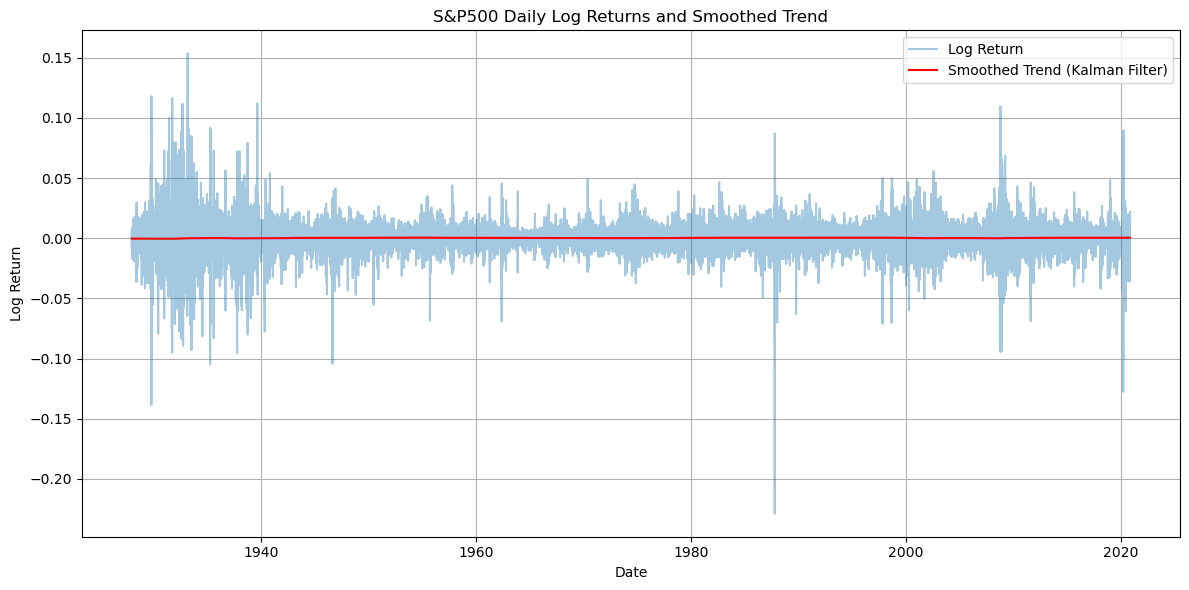

In [2]:
data = pd.read_csv("/Users/jiminbyun/Downloads/SPX.csv")

data['Date'] = pd.to_datetime(data['Date'])
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
log_returns = data[['Date', 'LogReturn']].dropna().set_index('Date')['LogReturn']

mod = sm.tsa.UnobservedComponents(log_returns, level='local level')
res_fit = mod.fit()

results_df = pd.DataFrame({
    'LogReturn': log_returns,
    'SmoothedTrend': res_fit.smoothed_state[0]
})

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['LogReturn'], label='Log Return', alpha=0.4)
plt.plot(results_df.index, results_df['SmoothedTrend'], label='Smoothed Trend (Kalman Filter)', color='red')
plt.title("S&P500 Daily Log Returns and Smoothed Trend")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94961D+00    |proj g|=  2.09851D+01

At iterate    5    f= -3.00143D+00    |proj g|=  5.07147D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     59      2     0     0   4.107D+00  -3.001D+00
  F =  -3.0014276540607971     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


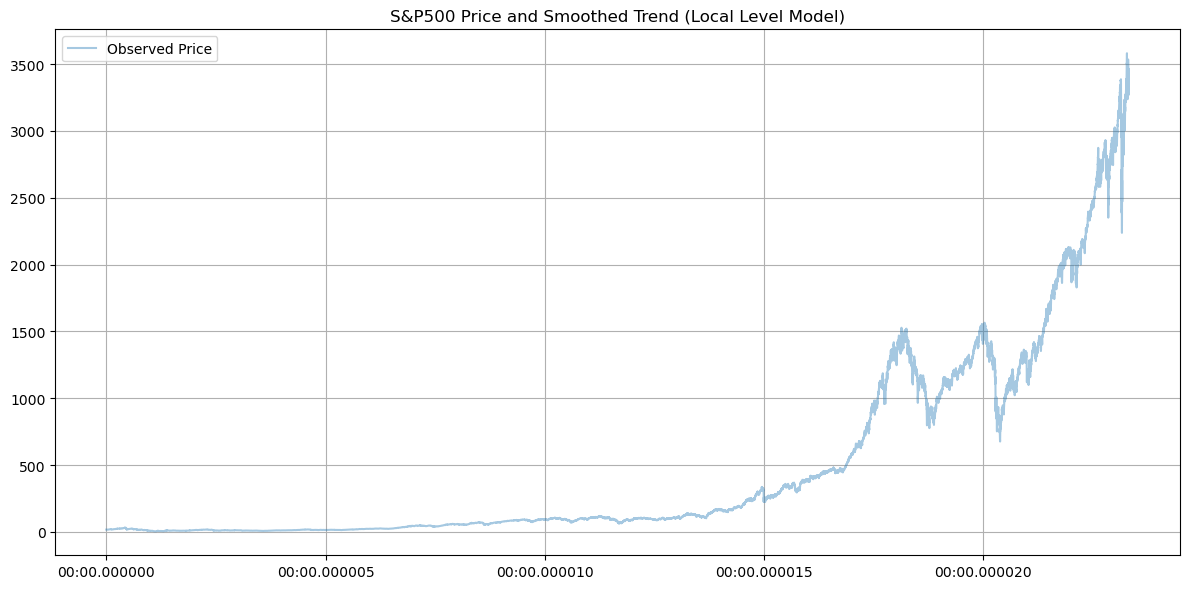

In [3]:
data.index = pd.to_datetime(data.index)

data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
log_returns = data['LogReturn'].dropna()
price = data['Close'].dropna()

mod = sm.tsa.UnobservedComponents(log_returns, level='local level')
res_fit = mod.fit()

plt.figure(figsize=(12, 6))
plt.plot(price.index, price, label='Observed Price', alpha=0.4)
plt.title("S&P500 Price and Smoothed Trend (Local Level Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
mod_price = sm.tsa.UnobservedComponents(price, level='local level')
res_price = mod_price.fit()

fitted_trend = pd.Series(res_price.smoothed_state[0], index=price.index)
residuals = price - fitted_trend
residuals.name = 'residual'

log_price_trend = np.cumsum(fitted_trend)

initial_price = data['Close'].iloc[1]
reconstructed_price = np.exp(log_price_trend) * initial_price
reconstructed_price = pd.Series(reconstructed_price, index=data.index[1:])

residuals_price = data['Close'].iloc[1:] - reconstructed_price
residuals_pct = residuals_price / reconstructed_price

/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50667D+00    |proj g|=  1.37615D-03

At iterate    5    f=  3.73290D+00    |proj g|=  6.42940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     28      1     0     0   3.370D-06   3.730D+00
  F =   3.7304359633794708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
threshold = 0.03
outliers = residuals_pct[np.abs(residuals_pct) > threshold]

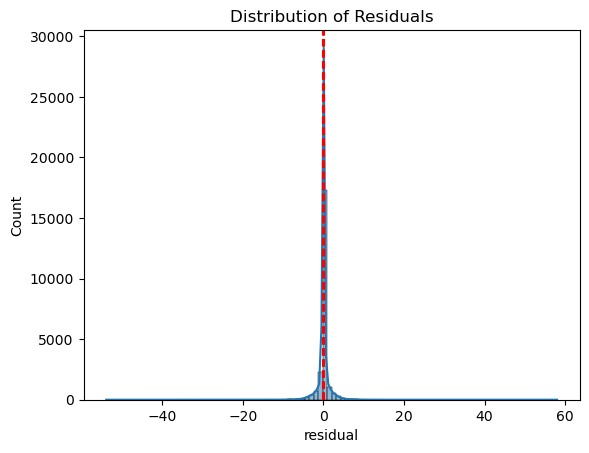

In [6]:
import seaborn as sns
sns.histplot(residuals, bins=100, kde=True)
plt.axvline(threshold, color='r', linestyle='--')
plt.axvline(-threshold, color='r', linestyle='--')
plt.title("Distribution of Residuals")
plt.show()


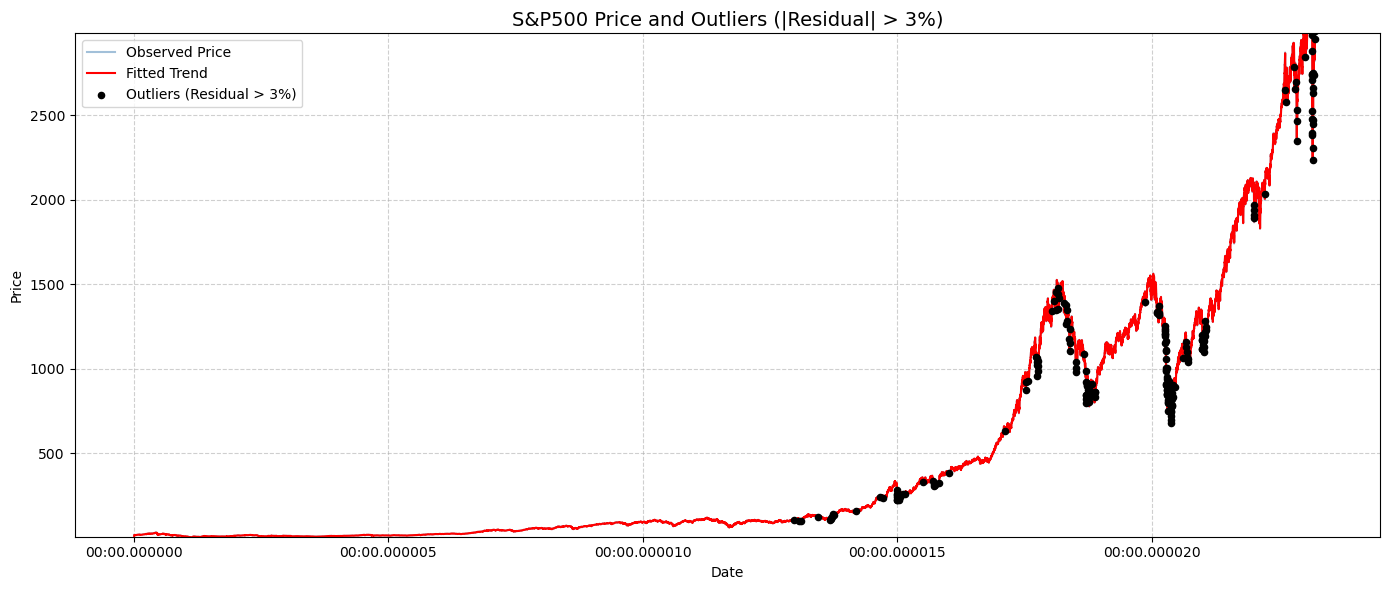

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(price.index, price, label='Observed Price', color='steelblue', alpha=0.5)
plt.plot(price.index, res_price.fittedvalues, label='Fitted Trend', color='red', linewidth=1.5)

residuals = price - res_price.fittedvalues
residuals_pct = residuals / price
valid_range = price[price > 100]
residuals_pct = (residuals / price).loc[valid_range.index]

threshold = 0.03
outliers = residuals_pct[np.abs(residuals_pct) > threshold]

plt.scatter(outliers.index, price.loc[outliers.index],
            color='black', label='Outliers (Residual > 3%)', s=20, zorder=5)

plt.title("S&P500 Price and Outliers (|Residual| > 3%)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.ylim(price.quantile(0.01), price.quantile(0.99)) 
plt.show()

In [8]:
price = price.squeeze()  # (1-column DataFrame → Series)

residuals = price - res_price.fittedvalues
residuals.name = 'Residual'

threshold = 0.03
outliers = residuals_pct[np.abs(residuals_pct) > threshold]

outlier_table = pd.DataFrame({
    'Price': price.loc[outliers.index],
    'Residual': outliers
})

print(outlier_table.head())


                                    Price  Residual
1970-01-01 00:00:00.000012964  106.629997 -0.031991
1970-01-01 00:00:00.000013074  102.260002 -0.031466
1970-01-01 00:00:00.000013099  103.430000  0.034055
1970-01-01 00:00:00.000013437  125.500000 -0.031207
1970-01-01 00:00:00.000013685  109.040001  0.045902


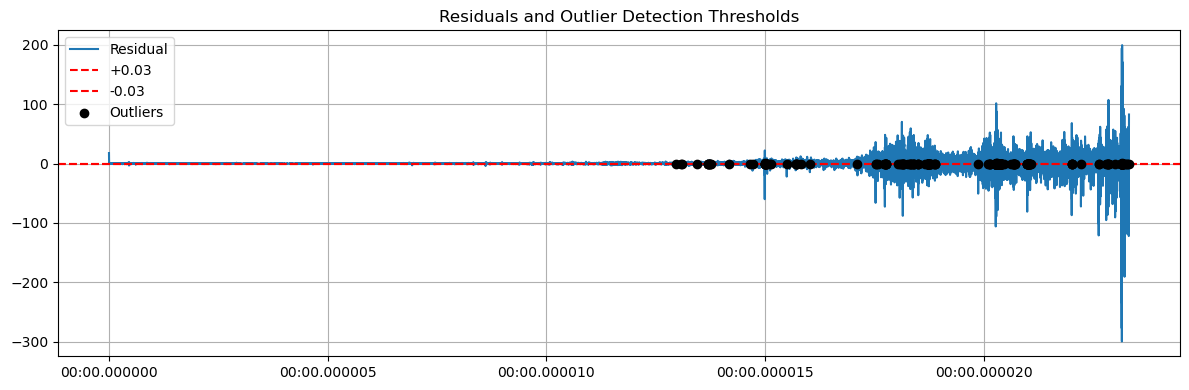

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(residuals.index, residuals, label='Residual')
plt.axhline(threshold, color='red', linestyle='--', label='+0.03')
plt.axhline(-threshold, color='red', linestyle='--', label='-0.03')
plt.scatter(outliers.index, outliers, color='black', zorder=5, label='Outliers')
plt.title("Residuals and Outlier Detection Thresholds")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
outlier_info = pd.DataFrame({
    'Date': outliers.index,
    'Price': price.loc[outliers.index],
    'Residual': residuals.loc[outliers.index]
}).reset_index(drop=True)

pd.set_option('display.max_rows', None)  
print(outlier_info)

                             Date        Price    Residual
0   1970-01-01 00:00:00.000012964   106.629997   -3.411235
1   1970-01-01 00:00:00.000013074   102.260002   -3.217708
2   1970-01-01 00:00:00.000013099   103.430000    3.522277
3   1970-01-01 00:00:00.000013437   125.500000   -3.916517
4   1970-01-01 00:00:00.000013685   109.040001    5.005138
5   1970-01-01 00:00:00.000013688   113.019997    3.943441
6   1970-01-01 00:00:00.000013689   116.110001    3.604246
7   1970-01-01 00:00:00.000013720   125.970001    4.046491
8   1970-01-01 00:00:00.000013733   133.320007   -5.536932
9   1970-01-01 00:00:00.000013740   142.869995    5.672996
10  1970-01-01 00:00:00.000013758   138.529999    4.259953
11  1970-01-01 00:00:00.000014183   162.350006    4.928842
12  1970-01-01 00:00:00.000014667   244.050003   -7.844382
13  1970-01-01 00:00:00.000014714   235.179993  -11.973536
14  1970-01-01 00:00:00.000014992   282.700012  -16.459597
15  1970-01-01 00:00:00.000014993   224.839996  -60.0064

In [11]:
residuals = price - res_price.fittedvalues
residuals = residuals.dropna()

log_sq_resid = np.log(residuals ** 2)


In [12]:
vol_model = sm.tsa.UnobservedComponents(log_sq_resid, level='local level')
vol_fit = vol_model.fit()

vol_smoothed = vol_fit.smoothed_state[0] 


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.66190D+00    |proj g|=  1.17247D-01

At iterate    5    f=  2.29048D+00    |proj g|=  1.86803D-01

At iterate   10    f=  2.28063D+00    |proj g|=  3.64017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     20      1     0     0   1.911D-06   2.281D+00
  F =   2.2806209950968666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


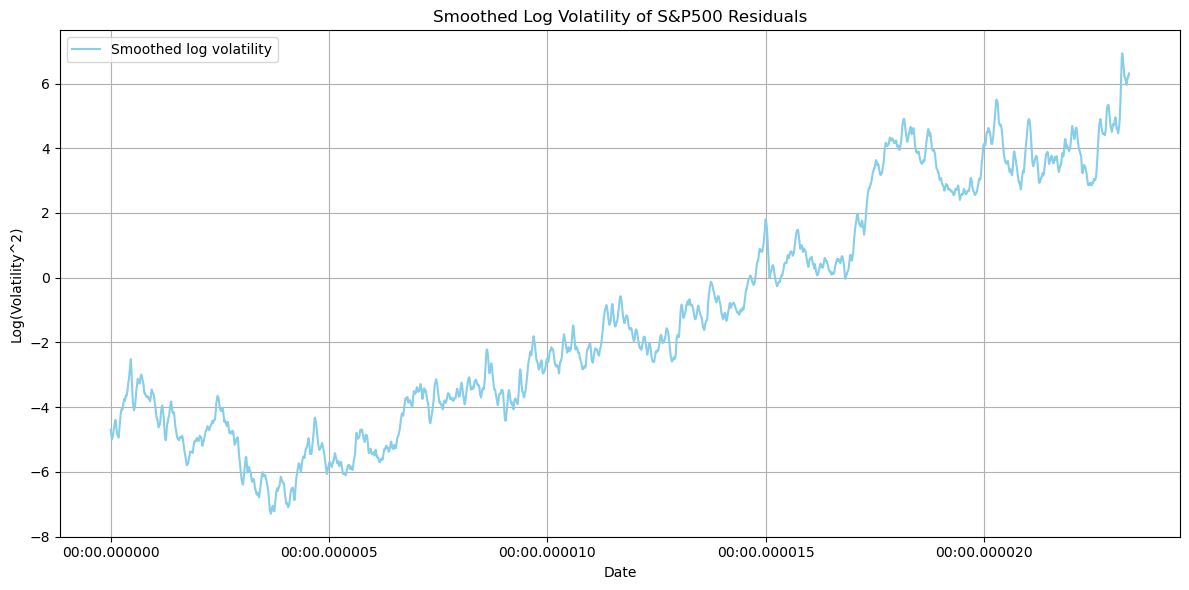

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(log_sq_resid.index, vol_smoothed, label='Smoothed log volatility', color='skyblue')
plt.title('Smoothed Log Volatility of S&P500 Residuals')
plt.xlabel('Date')
plt.ylabel('Log(Volatility^2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#미국 시장(S&P500)의 움직임과 한국 시장(KOSPI 또는 KOSDAQ 등)의 연결성 분석 (connectedness analysis)

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = pd.read_csv("/Users/jiminbyun/Downloads/SPX.csv", parse_dates=['Date'], index_col='Date')
sp500 = sp500[['Close']].dropna()
sp500['log_ret'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

df = pd.read_csv("/Users/jiminbyun/Downloads/kospi_english.csv")
df_long = df.melt(id_vars='Sector', var_name='Date', value_name='Close')
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y.%m', errors='coerce')
df_long['Close'] = pd.to_numeric(df_long['Close'].replace(',', '', regex=True), errors='coerce')

df_long = df_long.sort_values(['Sector', 'Date'])
df_long['log_ret'] = df_long.groupby('Sector')['Close'].transform(lambda x: np.log(x / x.shift(1)))
 
kospi = df_long[df_long['Sector'] == 'KOSPI 200'].dropna(subset=['log_ret'])
kospi = kospi.set_index('Date')

/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
kospi = df_long.groupby('Date')['log_ret'].mean().to_frame(name='log_ret')

kospi = kospi.sort_index() 
kospi = kospi.resample('D').ffill()

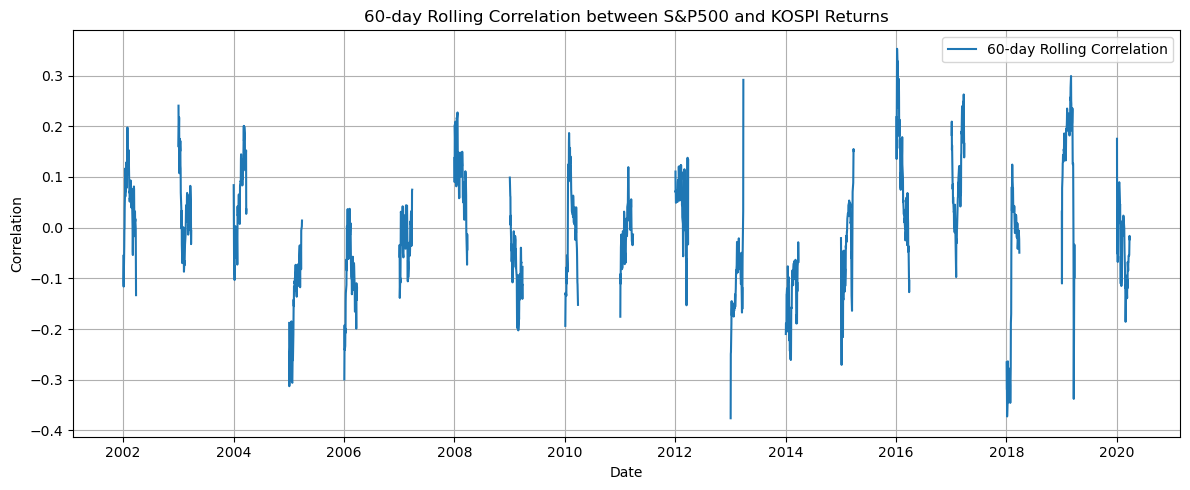

In [16]:
merged = pd.merge(
    sp500[['log_ret']], 
    kospi[['log_ret']], 
    left_index=True, right_index=True, 
    how='inner'
)

merged.columns = ['log_ret_sp', 'log_ret_ko']
merged.dropna(inplace=True)

rolling_corr = merged['log_ret_sp'].rolling(60).corr(merged['log_ret_ko'])

plt.figure(figsize=(12, 5))
plt.plot(rolling_corr.index, rolling_corr, label='60-day Rolling Correlation')
plt.title('60-day Rolling Correlation between S&P500 and KOSPI Returns')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
#Getting expected reasons for residuals(Relative news)

In [17]:
#From GNews

import requests
import pandas as pd
from datetime import timedelta

API_KEY = 'f3106a94916a7f52c360f7a9a6e0bf6d'  
BASE_URL = 'https://gnews.io/api/v4/search'

def get_news_on_date(date_str, query="S P 500"):
    date = pd.to_datetime(date_str)
    from_date = date.strftime('%Y-%m-%d')
    to_date = (date + timedelta(days=1)).strftime('%Y-%m-%d')

    params = {
        'q': query,
        'from': from_date,
        'to': to_date,
        'lang': 'en',      
        'sortBy': 'relevance',
        'max': 10,
        'token': API_KEY  
    }

    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        print(f"\n🗓️ {date_str} news:")
        for i, article in enumerate(articles, 1):
            print(f"\n[news {i}]")
            print("Title:", article['title'])
            print("Ref:", article['source']['name'])
            print("URL:", article['url'])
    else:
        print(f"Error {response.status_code} - {response.text}")

dates_to_check = [
    "1987-10-19",
    "2008-09-29",
    "2020-03-16"
]

for date_str in dates_to_check:
    get_news_on_date(date_str)
    




🗓️ 1987-10-19 news:

[news 1]
Title: US stocks drift closer to their record as Wall Street waits to see what US-China talks will bear
Ref: GuelphToday
URL: https://www.guelphtoday.com/national-business/us-stocks-drift-closer-to-their-record-as-wall-street-waits-to-see-what-us-china-talks-will-bear-10786172

[news 2]
Title: US stocks drift closer to their record as Wall Street waits to see what US-China talks will bear
Ref: Vancouver Is Awesome
URL: https://www.vancouverisawesome.com/national-business/us-stocks-drift-closer-to-their-record-as-wall-street-waits-to-see-what-us-china-talks-will-bear-10786183

[news 3]
Title: US stocks drift closer to their record as Wall Street waits to see what US-China talks will bear
Ref: BradfordToday
URL: https://www.bradfordtoday.ca/national-business/us-stocks-drift-closer-to-their-record-as-wall-street-waits-to-see-what-us-china-talks-will-bear-10786172

[news 4]
Title: US stocks drift closer to their record as Wall Street waits to see what US-Chin

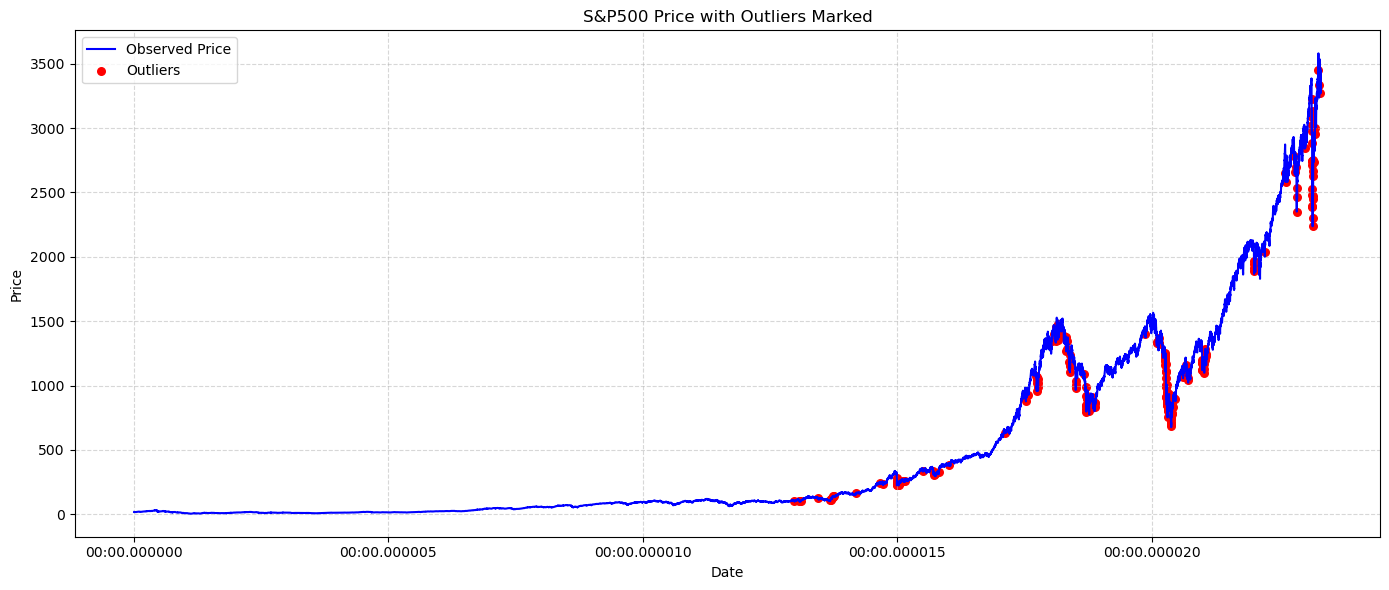

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(price.index, price, label='Observed Price', color='blue')
plt.scatter(outliers.index, price.loc[outliers.index], color='red', s=30, label='Outliers')
plt.title("S&P500 Price with Outliers Marked")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
#IRF Graph

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/jiminbyun/Downloads/SPX.csv", parse_dates=['Date'])
data = data.set_index('Date')
data = data.sort_index()

data['log_ret_sp'] = np.log(data['Close'] / data['Close'].shift(1))

data['log_vol_sp'] = np.log(data['log_ret_sp']**2 + 1e-8)

df = pd.read_csv("/Users/jiminbyun/Downloads/kospi_english.csv")
df_long = df.melt(id_vars='Sector', var_name='Date', value_name='Close')
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%Y.%m', errors='coerce')
df_long['Close'] = pd.to_numeric(df_long['Close'].replace(',', '', regex=True), errors='coerce')

df_long = df_long.sort_values(['Sector', 'Date'])
df_long['log_ret'] = df_long.groupby('Sector')['Close'].transform(lambda x: np.log(x / x.shift(1)))

kospi = df_long[df_long['Sector'] == 'KOSPI 200'].dropna(subset=['log_ret'])
kospi = kospi.set_index('Date')
kospi['log_ret_ko'] = np.log(kospi['Close'] / kospi['Close'].shift(1))
kospi['log_vol_ko'] = np.log(kospi['log_ret_ko']**2 + 1e-8)

merged = pd.merge(data[['log_vol_sp']], kospi[['log_vol_ko']], left_index=True, right_index=True)
vol_df = merged.dropna()


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
df = pd.read_csv("/Users/jiminbyun/Downloads/kospi_english.csv")

df_long = df.melt(id_vars='Sector', var_name='Date', value_name='Close')

df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')

df_long['Close'] = pd.to_numeric(df_long['Close'].replace(',', '', regex=True), errors='coerce')

df_long = df_long.sort_values(['Sector', 'Date'])
df_long['log_ret'] = df_long.groupby('Sector')['Close'].transform(lambda x: np.log(x / x.shift(1)))

kospi = df_long[df_long['Sector'] == 'Finance'].copy()
kospi = kospi.set_index('Date')
kospi['log_ret_ko'] = np.log(kospi['Close'] / kospi['Close'].shift(1))
kospi['log_vol_ko'] = np.log(kospi['log_ret_ko']**2 + 1e-8)


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
data['Month'] = data.index.to_period('M')
monthly_sp = data.groupby('Month')['log_vol_sp'].mean().dropna()
monthly_sp.index = monthly_sp.index.to_timestamp()

merged = pd.merge(monthly_sp, kospi['log_vol_ko'], left_index=True, right_index=True)
vol_df = merged.dropna()


/Users/jiminbyun/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


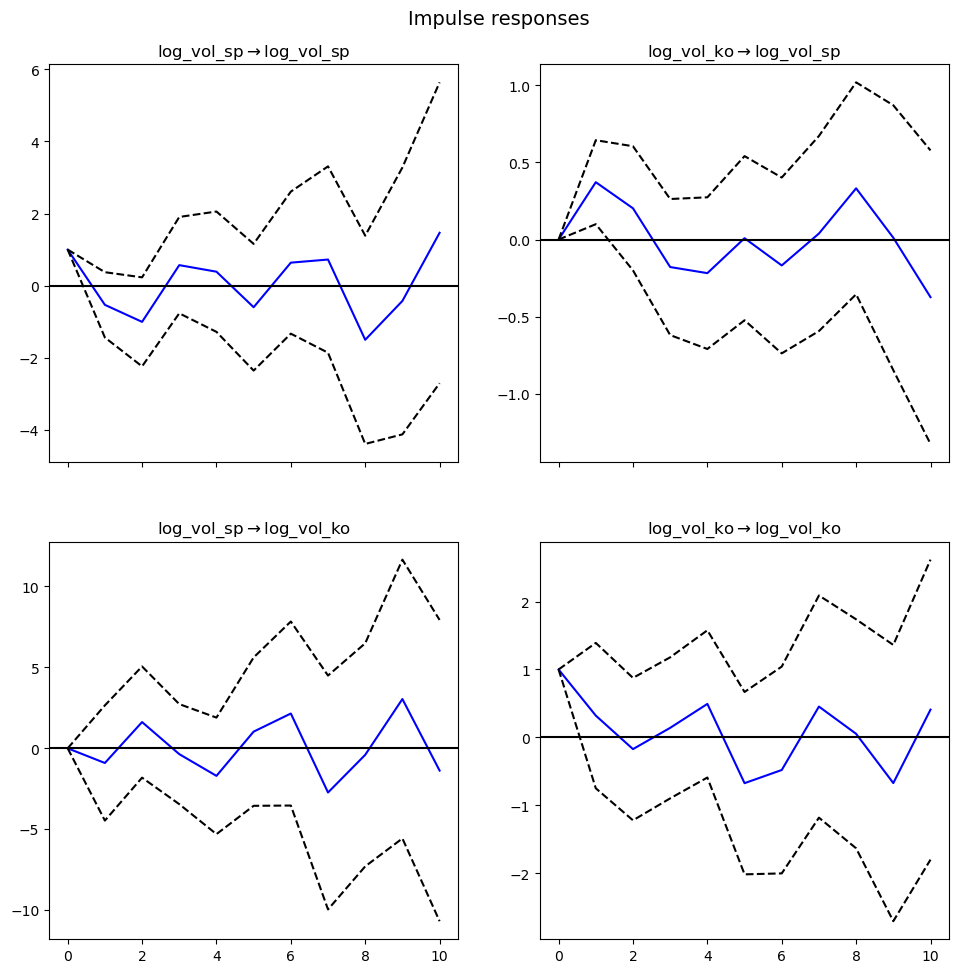

In [22]:
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

model = VAR(vol_df)
results = model.fit(maxlags=5, ic='aic')
irf = results.irf(10)
irf.plot(orth=False)
plt.show()




In [23]:
rows = []

variable_names = [col[0] if isinstance(col, tuple) else col for col in vol_df.columns.tolist()]

for i in range(irf.irfs.shape[1]):
    for j in range(irf.irfs.shape[2]):
        ir_series = irf.irfs[:, i, j]
        max_effect = np.max(np.abs(ir_series))
        max_idx = np.argmax(np.abs(ir_series))

        rows.append({
            "Impulse": variable_names[i],
            "Response": variable_names[j],
            "Max Effect": round(ir_series[max_idx], 4),
            "Days to Max": max_idx,
            "Significant": "– (Not Tested)"
        })

irf_summary = pd.DataFrame(rows)
print(irf_summary)


      Impulse    Response  Max Effect  Days to Max     Significant
0  log_vol_sp  log_vol_sp     -1.5016            8  – (Not Tested)
1  log_vol_sp  log_vol_ko     -0.3735           10  – (Not Tested)
2  log_vol_ko  log_vol_sp      3.0434            9  – (Not Tested)
3  log_vol_ko  log_vol_ko      1.0000            0  – (Not Tested)


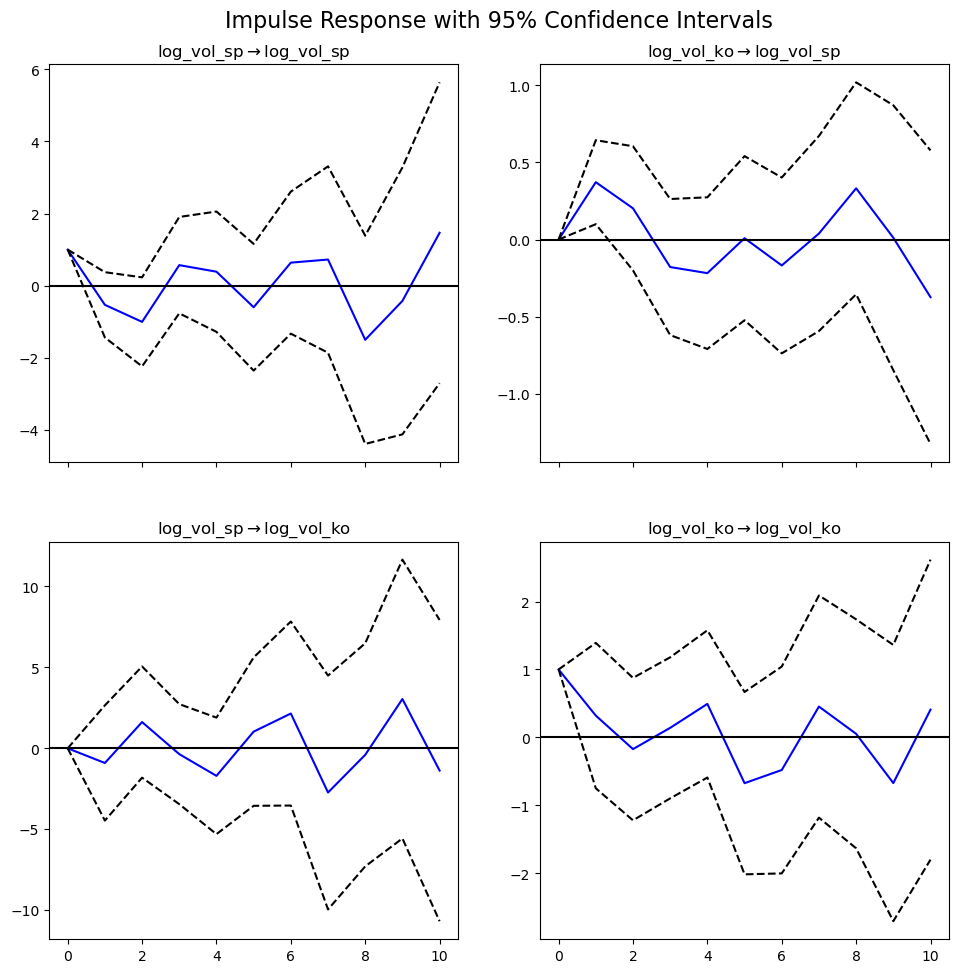

In [24]:
irf = results.irf(10) 

irf_ci = results.irf(10).plot(orth=False, signif=0.05)
plt.suptitle("Impulse Response with 95% Confidence Intervals", fontsize=16)
plt.show()


In [26]:
irf_values = irf.irfs  
lower_bounds, upper_bounds = irf.cis(orth=False)  

impulse_idx = vol_df.columns.get_loc("log_vol_sp")
response_idx = vol_df.columns.get_loc("log_vol_ko")

print("Impulse Response Values (log_vol_sp → log_vol_ko):")
print(irf_values[:, response_idx, impulse_idx])
print("Lower Bound:")
print(lower_bounds[:, response_idx, impulse_idx])
print("Upper Bound:")
print(upper_bounds[:, response_idx, impulse_idx])



AttributeError: 'IRAnalysis' object has no attribute 'cis'